<a href="https://colab.research.google.com/github/kunal-git-002/CNN/blob/master/CNN_on_mnist_8x8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Convolution2D,MaxPooling2D

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_digits

dig=load_digits()

df=pd.DataFrame(data=dig.data)
df["number"]=dig.target

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


***visulize the number***

In [ ]:
num=df.iloc[179,:64]
arr=num.to_numpy()

In [ ]:
arr=arr.reshape(8,8)

In [ ]:
plt.imshow(arr, cmap='gray')
plt.show()

***Preprocessing the data***

In [ ]:
one_y=pd.get_dummies(df["number"],prefix="num")

In [ ]:
new_df=df.join(one_y)

In [ ]:
new_df.drop("number",axis=1,inplace=True)

In [ ]:
x=new_df.iloc[:,:64]

In [ ]:
df_x=x.values.reshape(len(new_df),8,8,1)#labels

In [ ]:
type(df_x)

numpy.ndarray

In [ ]:
df_y=new_df.iloc[:,64:]#target

In [ ]:
print("X len :",len(df_x)," X shape: ",df_x.shape)
print("Y len :",len(df_y)," Y shape: ",df_y.shape)

X len : 1797  X shape:  (1797, 8, 8, 1)
Y len : 1797  Y shape:  (1797, 10)


In [ ]:
x_tr,x_te,y_tr,y_te=train_test_split(df_x,df_y,test_size=0.2,random_state=17)

In [ ]:
len(x_te)

360

***model building***

In [ ]:
model=Sequential()

#layer 1 & 2 : conv & relu
model.add(Convolution2D(32,2,data_format="channels_last",activation="relu",input_shape=(8,8,1)))

#layer 3: pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 4:flatten layer
#Flatten layer that converts the 2D matrix data to a 1D vector before building the fully connected layers.
model.add(Flatten())

#fully connected network
model.add(Dense(100))#100 ketla op nodes jove te
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adadelta",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 7, 7, 32)          160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               28900     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)               

***1 training***

In [ ]:
model.fit(x=x_tr,y=y_tr,validation_data=(x_te,y_te),epochs=100)

***2 testing***

In [ ]:
test_error_rate = model.evaluate(x_te, y_te, verbose=0)
test_error_rate

[0.4204087555408478, 0.8888888955116272]

***3 prediction***

In [ ]:
y_pred=model.predict(x_te[:])

In [ ]:
#y_pred
ind_res=[]
for i in y_pred:
  ind_res.append(np.argmax(i))

In [ ]:
#y true
df_temp=df.loc[y_te.index,"number"]

In [ ]:
final_df=pd.DataFrame({"y_true":df_temp,
                       "y_pred":ind_res})

***show our prediction in confusion matrix***

In [ ]:
from sklearn.metrics import confusion_matrix


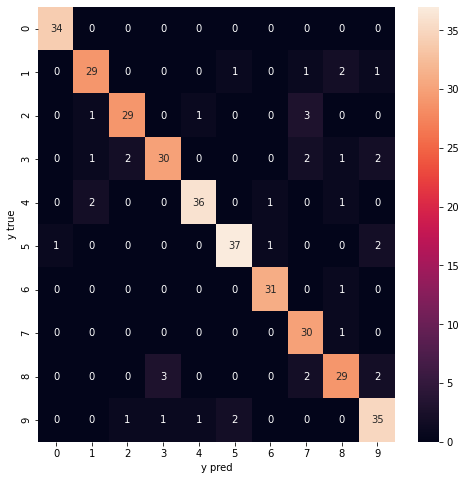

In [ ]:
from seaborn import heatmap

fig=plt.figure(figsize=(8,8))

confusion_matrix = pd.crosstab(final_df['y_true'], final_df['y_pred'], rownames=['y true'], colnames=['y pred'])


heatmap(confusion_matrix,annot=True)

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(final_df["y_true"], final_df["y_pred"])

acc_score

0.8888888888888888